In [154]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [182]:
test_df = pd.read_csv('paris_airbnb_test.csv').iloc[: , 1:]
train_df = pd.read_csv('paris_airbnb_train.csv').iloc[: , 1:]
train_df.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,0.503868,-0.296884,-0.293537,0.20531,65.0,-0.184601,1.062858,-0.564545
1,-0.131849,0.892605,0.843973,0.20531,98.0,-0.101183,1.061018,-0.636924
2,-0.767566,-1.486372,-0.293537,-0.64526,65.0,0.037847,1.062858,-0.651400
3,-0.767566,-0.296884,-0.293537,-0.64526,45.0,-0.101183,1.062858,0.550105
4,-0.131849,-0.296884,-0.293537,0.20531,65.0,-0.101183,-0.335685,-0.579021


In [204]:
grid_search = [1,2,3,4,5,10,15,20,25,50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000]

In [206]:
features = train_df.columns.tolist()
features.remove('price')
errors = {}

In [208]:
for i in range(len(features)):
    errors[i] = {}
    for k in grid_search:
        knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
        knn.fit(train_df[features[:i+1]], train_df['price'])
        predictions = knn.predict(test_df[features[:i+1]])
        mse = mean_squared_error(test_df['price'], predictions)
        rmse = np.sqrt(mse)
        errors[i][k] = (mse, rmse)

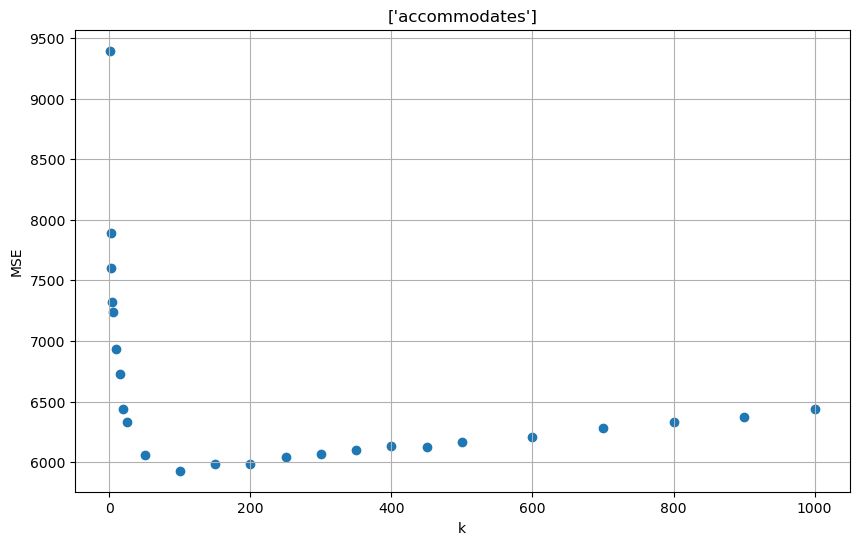

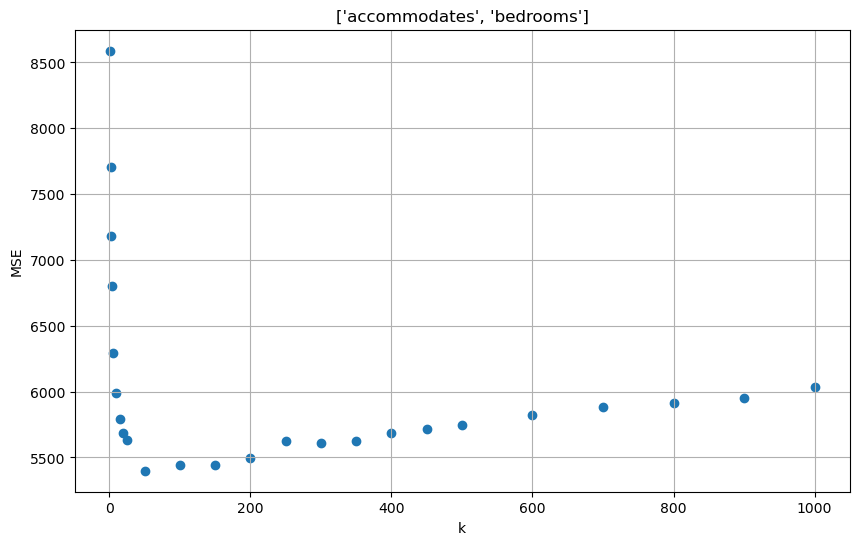

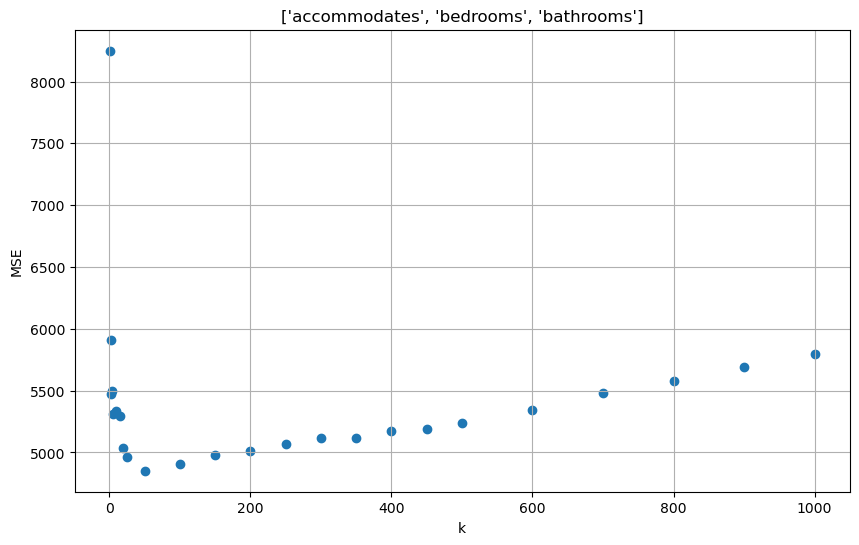

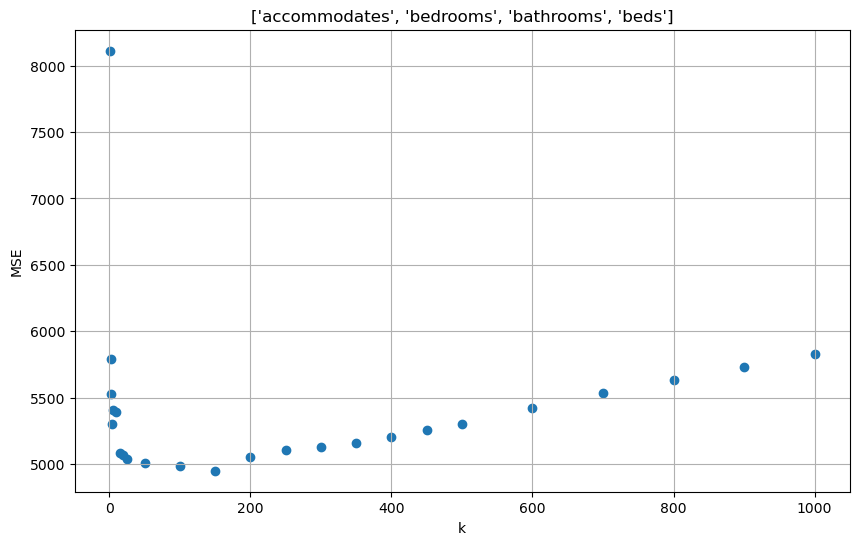

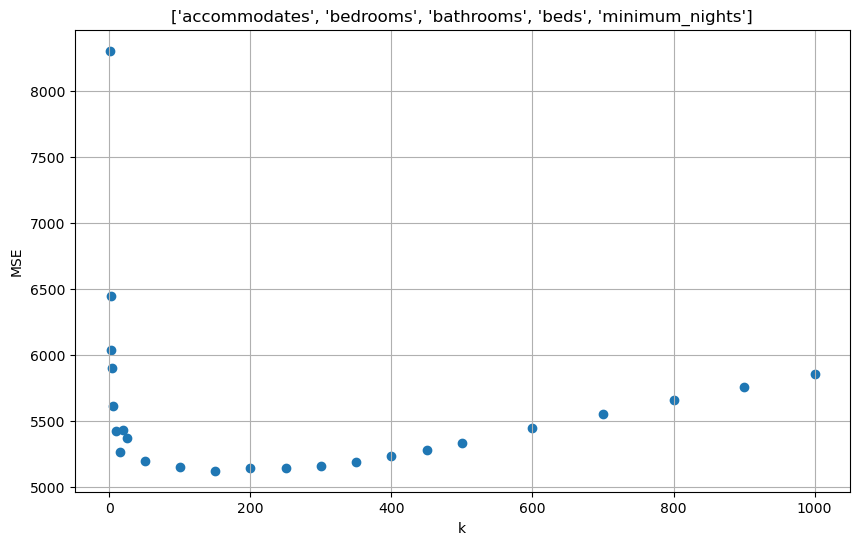

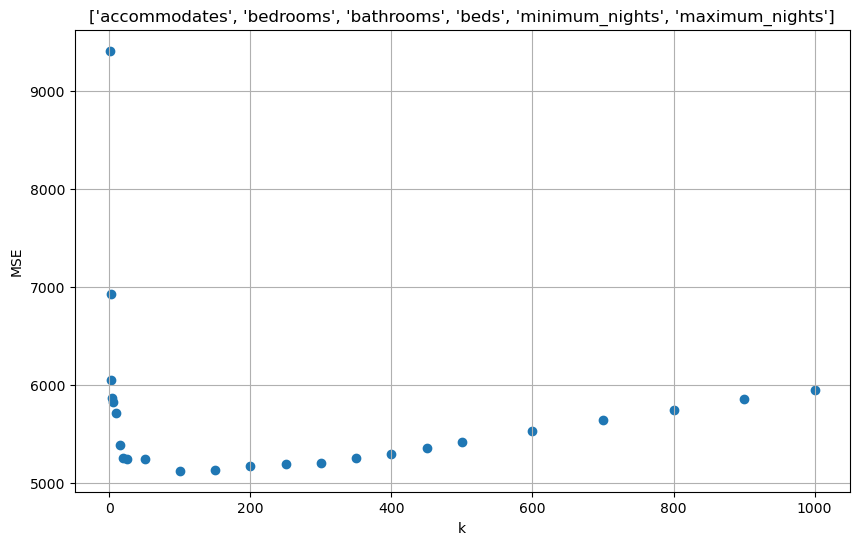

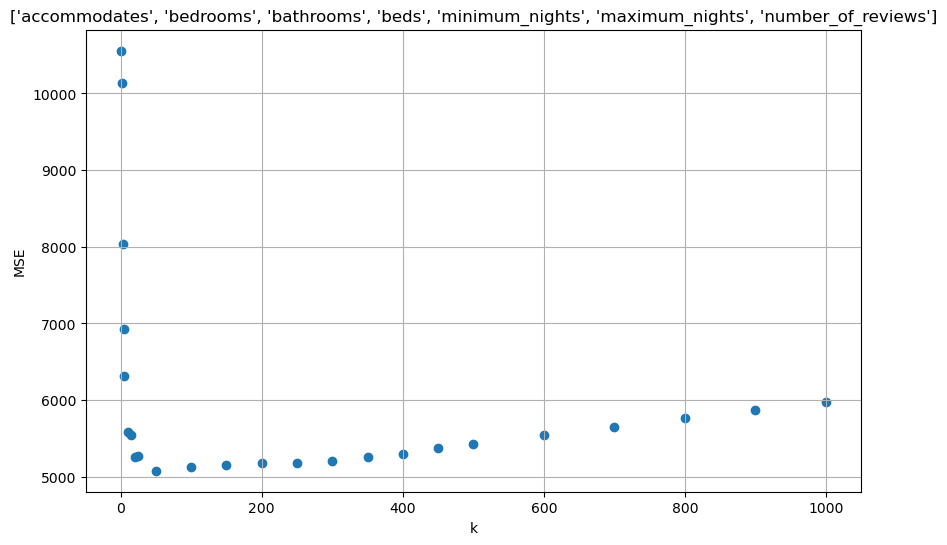

In [228]:
for i in errors:
    k_values = []
    mse_values = []
    
    for k in errors[i]:
        k_values.append(k)
        mse, _ = errors[i][k]
        mse_values.append(mse)
    
    # Plotting
    plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
    plt.scatter(k_values, mse_values, label=f'For {features[:i+1]} set')
    plt.title(f'{features[:i+1]}')
    plt.xlabel('k')
    plt.ylabel('MSE')
    # plt.legend()
    plt.grid(True)  # Optional: Add grid for better readability
    plt.show()

In [230]:
best_k_per_i = {}

for i in errors:
    # Initialize variables to track the best 'k' and its MSE for the current 'i'
    best_k = None
    lowest_mse = float('inf')  # Set initial MSE to infinity for comparison

    for k in errors[i]:
        mse, _ = errors[i][k]
        
        if mse < lowest_mse:
            best_k = k
            lowest_mse = mse

    best_k_per_i[i] = (best_k, lowest_mse)

print(best_k_per_i)

{0: (100, 5929.120937037037), 1: (50, 5398.96230172144), 2: (50, 4851.876234950443), 3: (150, 4950.610258668058), 4: (150, 5123.670489143917), 5: (100, 5122.673946948357), 6: (50, 5078.087877725613)}


In [232]:
smallest_mse = float('inf')
best_i = None

for i, (k, mse) in best_k_per_i.items():
    if mse < smallest_mse:
        smallest_mse = mse
        best_i = i

if best_i is not None:
    print(f"{features[:best_i+1]} set with k={best_k_per_i[best_i][0]} has the smallest MSE: {smallest_mse}")
else:
    print("No entries found.")

['accommodates', 'bedrooms', 'bathrooms'] set with k=50 has the smallest MSE: 4851.876234950443
